In [5]:
# Note: I have commented the code cells where the models are run and saved the outputs as text cells
# Please uncomment the code in case you want to run / modify the models yourself.

In [6]:
## Detailed analysis of the chosen dataset
## EDA Tasks
## Modelling and find best model
## Optimize the learning parameters for model performance

In [7]:
"""
Project Description : Sentiment Analysis

You are given the real data of tweets collected during the outbreak of Covid-19 disease.
The perception of the disease played an important role in providing phychological care to individuals where negative sentiments influenced peoples phychological health.
You as a Data Scientist will be doing a sentiment analysis of the collected tweets to find which parts of the world were affected the most from mental trauma and indeed 
provide a real time analysis of the situation so that these parts can be reached in future in advance if there is any outbreak of a mass disease.
"""

'\nProject Description : Sentiment Analysis\n\nYou are given the real data of tweets collected during the outbreak of Covid-19 disease.\nThe perception of the disease played an important role in providing phychological care to individuals where negative sentiments influenced peoples phychological health.\nYou as a Data Scientist will be doing a sentiment analysis of the collected tweets to find which parts of the world were affected the most from mental trauma and indeed \nprovide a real time analysis of the situation so that these parts can be reached in future in advance if there is any outbreak of a mass disease.\n'

In [8]:
# utilities
import re
import numpy as np
import pandas as pd
import string
from matplotlib import rcParams
from collections import Counter
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('all')
from nltk import  PorterStemmer
from nltk.stem import PorterStemmer
# sklearn
#pip install -U scikit-learn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# vader
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Insert dataset and format into columns
DATASET_COLUMNS=['UserName','ScreenName','Location','TweetAt','OriginalTweet','Sentiment']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Corona.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Sample 5 responses
df.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
32835,36633,81585,Shanghai,07-04-2020,"Shagang, the largest EAF steelmaker in China, ...",Negative
5356,9154,54106,NaN,18-03-2020,Hey @newscomauHQ @hannahpaine_ how about ins...,Positive
19148,22946,67898,NaN,24-03-2020,All this stress with COVID-19 and my job has m...,Positive
41146,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
1558,5356,50308,"Hamilton Ontario, Canada",17-03-2020,As a result of COVID 19 many people cannot aff...,Positive


In [10]:
# Fill null values Row-wise. In the given dataset, only locations are missing and hence the locations of missing values will be filled in with their ScreenName(s).
df=df.fillna(method='ffill',axis=1)
df.dropna()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
2,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
3,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
4,3802,48754,48754,16-03-2020,My food stock is not the only one which is emp...,Positive
...,...,...,...,...,...,...
41153,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41154,44952,89904,89904,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41155,44953,89905,89905,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41156,44954,89906,89906,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [11]:
# Drop first row for plotting later
df.drop(index=df.index[0], axis=0, inplace=True)

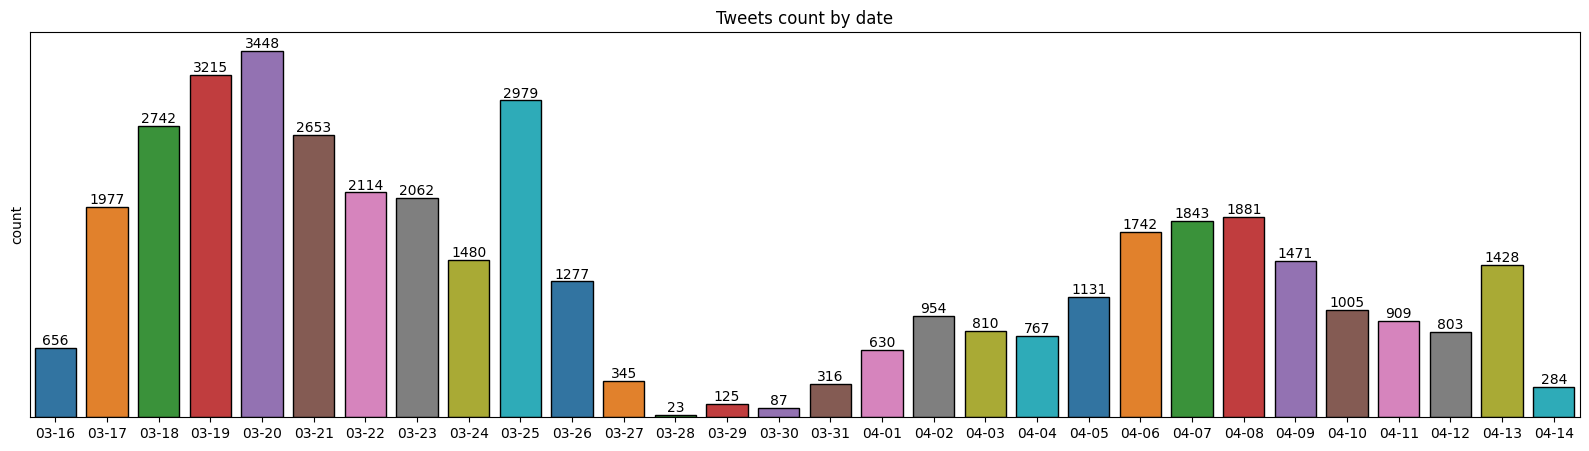

In [12]:
# Tweets count by date
df['Date'] = pd.to_datetime(df['TweetAt'], infer_datetime_format=True)
tweets_per_day = df['Date'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')

plt.figure(figsize=(20,5))
ax = sns.barplot(x='index', y='counts', data=tweets_per_day,edgecolor = 'black', palette='tab10')
plt.title('Tweets count by date')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

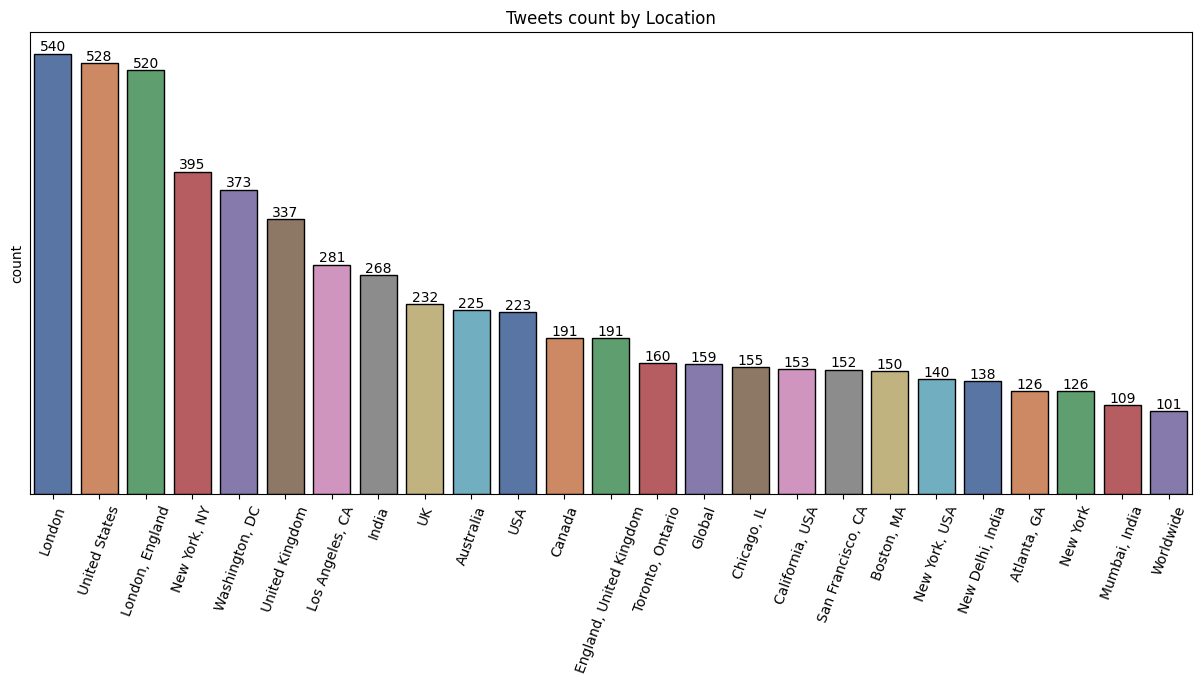

In [13]:
# Tweets count by Location
tweets_per_country = df['Location'].value_counts().loc[lambda x : x > 100].reset_index(name='counts')

plt.figure(figsize=(15,6))
ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black', palette='deep')
plt.title('Tweets count by Location')
plt.xticks(rotation=70)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

<Axes: xlabel='Sentiment', ylabel='count'>

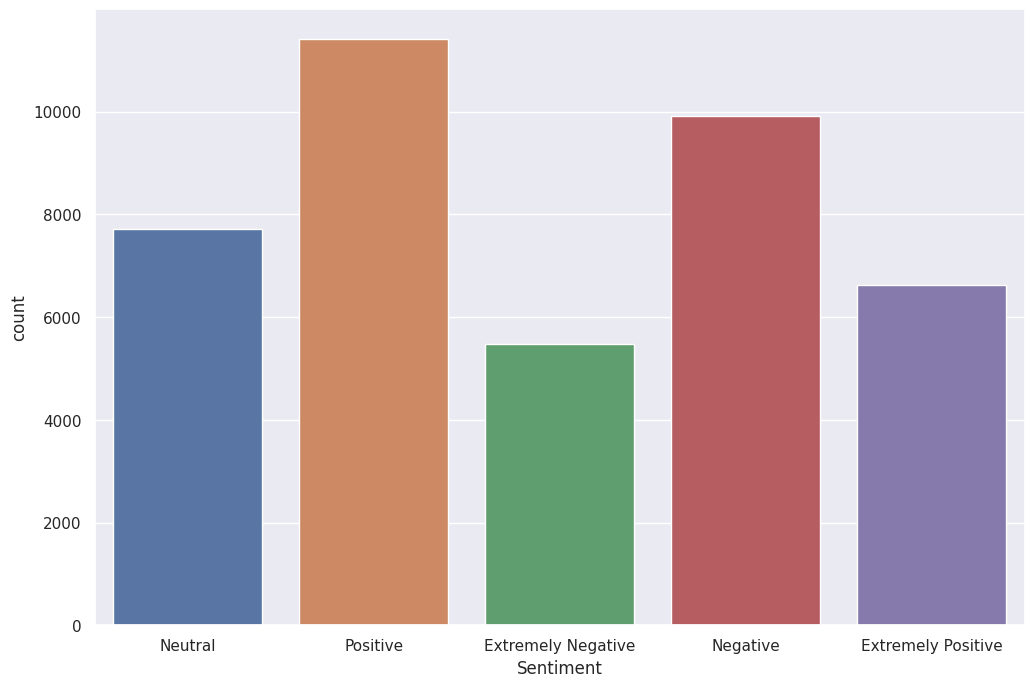

In [14]:
# Plotting the distribution for dataset.
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='Sentiment', data=df)

In [15]:
# drop Neutral sentiments and change labelling of Extremely Positive and Extremely Negative Sentiments to Positive and Negative values respectively
df.drop(df.loc[df['Sentiment']=='Neutral'].index, inplace=True)
df.loc[ df['Sentiment'] == 'Extremely Positive', 'Sentiment'] = 'Positive'
df.loc[ df['Sentiment'] == 'Extremely Negative', 'Sentiment'] = 'Negative'

In [16]:
# New dataset with the required columns
data=df[['OriginalTweet','Sentiment']]

In [17]:
# See all unique Sentiment Values
data['Sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [18]:
# Split to positive and negative datasets
data_pos = data[data['Sentiment'] == 'Positive']
data_neg = data[data['Sentiment'] == 'Negative']
data_pos = data_pos.iloc[:int(18000)]
data_neg = data_neg.iloc[:int(15000)]

In [19]:
# Concatenate for formatting
dataset = pd.concat([data_pos, data_neg])

In [20]:
print(dataset)

                                           OriginalTweet Sentiment
2      advice Talk to your neighbours family to excha...  Positive
3      Coronavirus Australia: Woolworths to give elde...  Positive
4      My food stock is not the only one which is emp...  Positive
6      As news of the regionÂs first confirmed COVID...  Positive
7      Cashier at grocery store was sharing his insig...  Positive
...                                                  ...       ...
40009  64 out of 121 countries are spending more on d...  Negative
40010  We virtually gathered HR leaders of retail com...  Negative
40011  Solutions to #COVID19 supermarket supply probl...  Negative
40019  All our online shopping infected by Smart woma...  Negative
40023  "For Trump, the economy is basically the stock...  Negative

[33000 rows x 2 columns]


In [21]:
# Convert tweets to lower for ease of tokenization and comparison
dataset['OriginalTweet']=dataset['OriginalTweet'].str.lower()
dataset['OriginalTweet'].tail()

40009    64 out of 121 countries are spending more on d...
40010    we virtually gathered hr leaders of retail com...
40011    solutions to #covid19 supermarket supply probl...
40019    all our online shopping infected by smart woma...
40023    "for trump, the economy is basically the stock...
Name: OriginalTweet, dtype: object

In [22]:
# stopwordlist
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
# Define function for cleaning stopwords
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
dataset['OriginalTweet'].head()

# Define function for cleaning punctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['OriginalTweet']= dataset['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))
dataset['OriginalTweet'].tail()

# Define function for cleaning repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['OriginalTweet'].tail()

# Define function for cleaning URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: cleaning_URLs(x))
dataset['OriginalTweet'].tail()

# Define function for cleaning numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: cleaning_numbers(x))
dataset['OriginalTweet'].tail()

# Create a reference variable for Class RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(tokenizer.tokenize)

In [24]:
print(dataset['OriginalTweet'])

2        [advice, talk, neighbours, family, exchange, p...
3        [coronavirus, australia, woolworths, give, eld...
4        [food, stock, not, one, empty, please, dont, p...
6        [news, regionâs, first, confirmed, covi, case...
7        [cashier, grocery, store, sharing, insights, c...
                               ...                        
40009    [countries, spending, debt, servicing, public,...
40010    [virtually, gathered, hr, leaders, retail, com...
40011    [solutions, covi, supermarket, supply, problem...
40019    [online, shopping, infected, smart, woman, not...
40023    [for, trump, economy, basically, stock, market...
Name: OriginalTweet, Length: 33000, dtype: object


In [25]:
# Create Word Stemmer
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['OriginalTweet']= dataset['OriginalTweet'].apply(lambda x: stemming_on_text(x))
dataset['OriginalTweet'].head()

# Create Word Lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['OriginalTweet'].head()

2    [advice, talk, neighbours, family, exchange, p...
3    [coronavirus, australia, woolworths, give, eld...
4    [food, stock, not, one, empty, please, dont, p...
6    [news, regionâs, first, confirmed, covi, case...
7    [cashier, grocery, store, sharing, insights, c...
Name: OriginalTweet, dtype: object

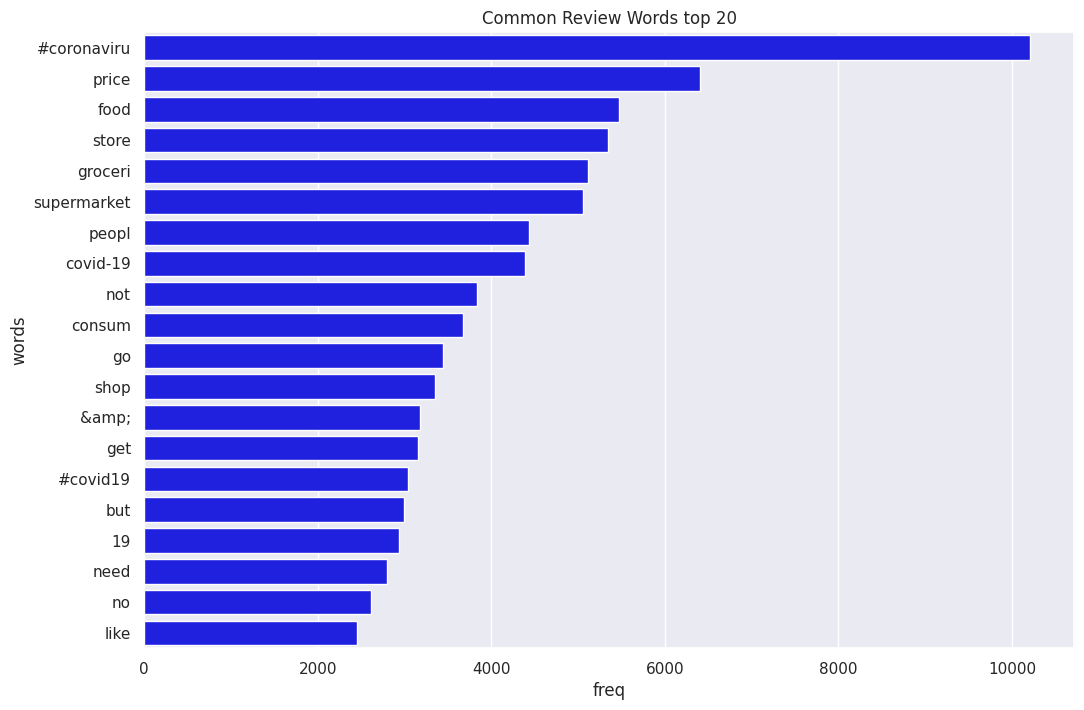

In [26]:
# Common Review Words top 20

def clean_text(text):
  ps=PorterStemmer()
  text_cleaned="".join([x for x in text if x is not string.punctuation])
  text_cleaned=re.sub(' +',' ',text_cleaned)
  text_cleaned=text_cleaned.lower()
  tokens=text_cleaned.split(" ")
  tokens=[token for token in tokens if token not in STOPWORDS]
  text_cleaned=" ".join([ps.stem(token) for token in tokens])
  
  return text_cleaned

df['cleaned_reviews']=df['OriginalTweet'].apply(lambda x:clean_text(x))

analyser=SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
    
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

df['sentiment_score']=df['OriginalTweet'].apply(lambda x:compound_score(x))
df['sentiment_score']

def sentiment_category(score):
    
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "neutral"

df['review_category']=df['sentiment_score'].apply(lambda x :sentiment_category(x))

positive_reviews=df.loc[df['review_category']=='Positive','cleaned_reviews'].tolist()
positive_reviews[0:5]

negative_reviews=df.loc[df['review_category']=='Negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

getMostCommon(df['cleaned_reviews'].tolist(),topn=20)
reviews_list=df['cleaned_reviews'].tolist()

def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

plotMostCommonWords(reviews_list)


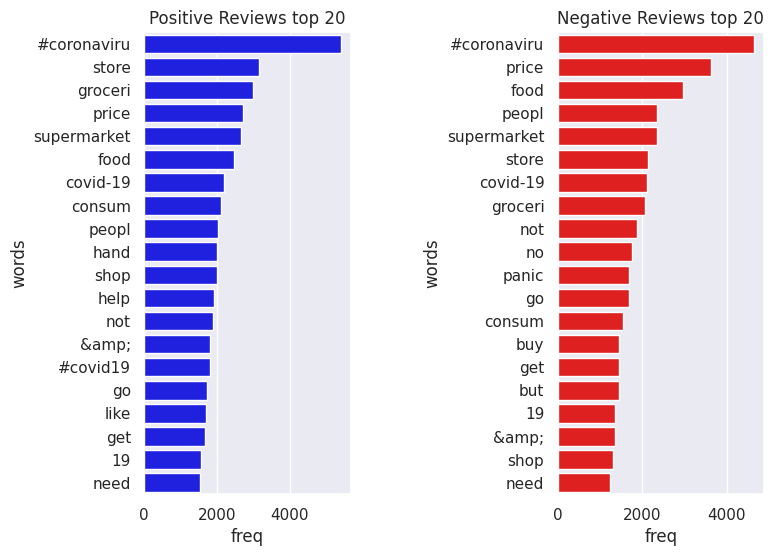

In [27]:
# Positive Review Unigrams and Negative Review Unigrams top 20


def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1.0) #Adjusts the space between the two plots

plotMostCommonWords(positive_reviews,20,"Positive Reviews",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Reviews",color="red",axis=ax[1])


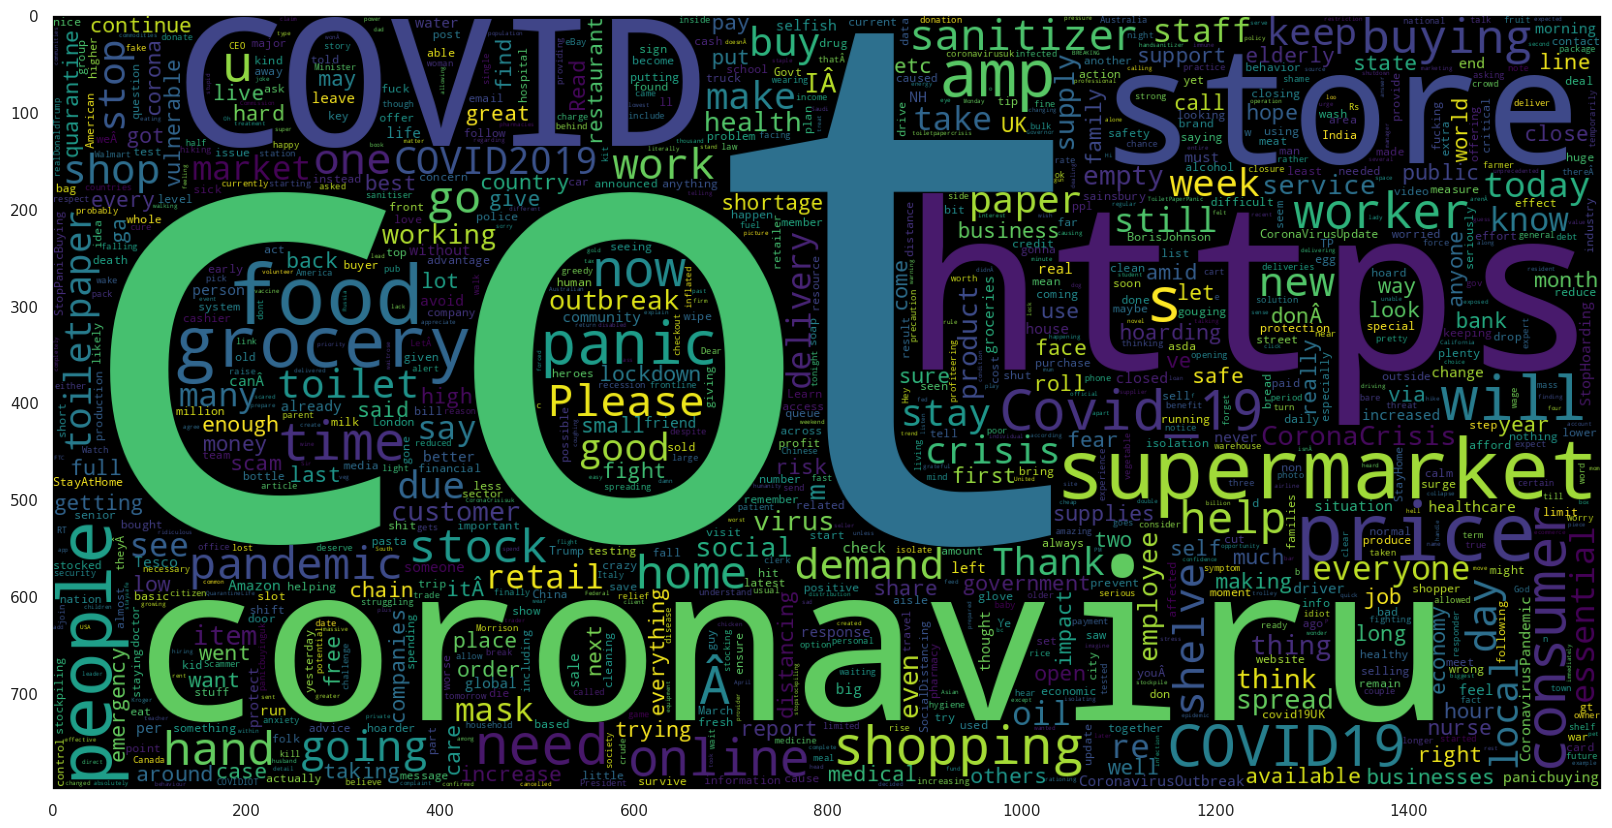

In [28]:
# Most common negative words
data_neg = data['OriginalTweet'][0:18000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.grid(False)

In [29]:
# Length of negative words
print(len(data_neg))

18000


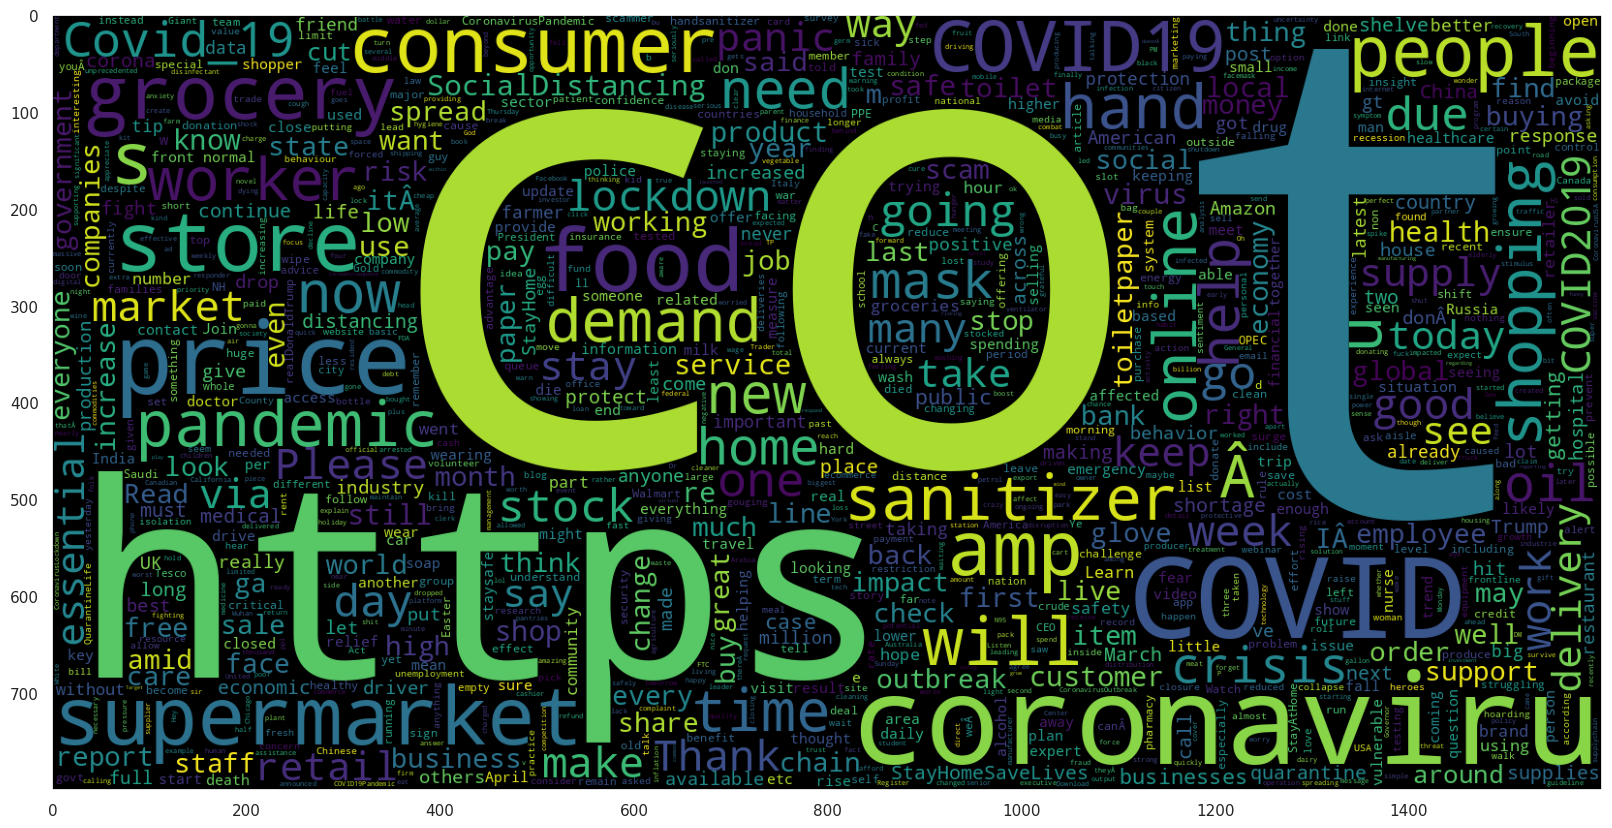

In [30]:
# Most common positive words
data_pos = data['OriginalTweet'][18000:33000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.grid(False)

In [31]:
# Length of positive words
print(len(data_pos))

15000


In [32]:
# Split to components
X=data.OriginalTweet
y=data.Sentiment

# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [33]:
# Apply TfidVectoriser
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000000)
vectoriser.fit(X_train.ravel())
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

# Vectorizer transform
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

No. of feature_words:  465622


In [34]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  fig, ax = plt.subplots(figsize=(4, 4))
  ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(cf_matrix.shape[0]):
      for j in range(cf_matrix.shape[1]):
          ax.text(x=j, y=i, s=cf_matrix[i, j], va='center', ha='center')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.tight_layout()

In [35]:
# Implement SVC
"""
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
"""

'\nSVCmodel = LinearSVC()\nSVCmodel.fit(X_train, y_train)\nmodel_Evaluate(SVCmodel)\ny_pred2 = SVCmodel.predict(X_test)\n'

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.86       818
    Positive       0.86      0.87      0.87       855

    accuracy                           0.86      1673
   macro avg       0.86      0.86      0.86      1673
weighted avg       0.86      0.86      0.86      1673

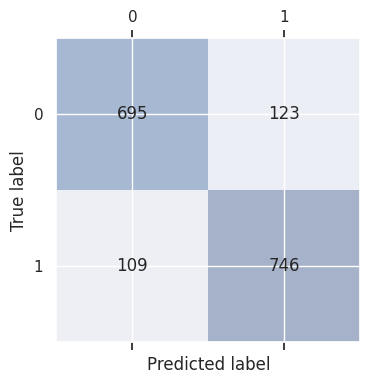

In [36]:
# Implement Logistic Regression
"""
LRmodel = LogisticRegression(C = 2, max_iter = 100, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
"""

'\nLRmodel = LogisticRegression(C = 2, max_iter = 100, n_jobs=-1)\nLRmodel.fit(X_train, y_train)\nmodel_Evaluate(LRmodel)\ny_pred3 = LRmodel.predict(X_test)\n'

           precision    recall  f1-score   support

    Negative       0.85      0.81      0.83       818
    Positive       0.82      0.86      0.84       855
    accuracy                           0.84      1673
   macro avg       0.84      0.84      0.84      1673
weighted avg       0.84      0.84      0.84      1673
    

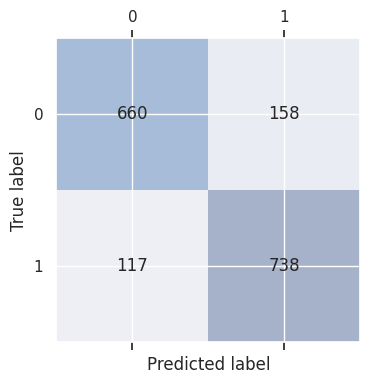

In [37]:
# Implement Random Forest Classifier
"""
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
model_Evaluate(text_classifier)
y_pred1 = text_classifier.predict(X_test)
"""

'\ntext_classifier = RandomForestClassifier(n_estimators=200, random_state=0)\ntext_classifier.fit(X_train, y_train)\nmodel_Evaluate(text_classifier)\ny_pred1 = text_classifier.predict(X_test)\n'

                precision    recall  f1-score   support

    Negative       0.81      0.69      0.75       818
    Positive       0.74      0.85      0.79       855

    accuracy                           0.77      1673
   macro avg       0.78      0.77      0.77      1673
weighted avg       0.78      0.77      0.77      1673


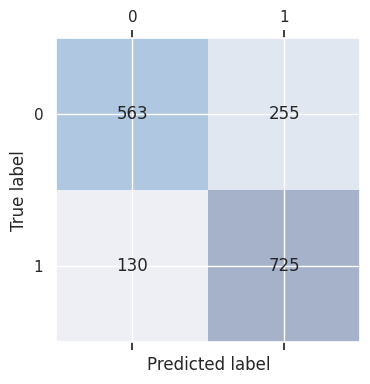

In [38]:
# Implement Bernoulli Naive Bayes
"""
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
"""

'\nBNBmodel = BernoulliNB()\nBNBmodel.fit(X_train, y_train)\nmodel_Evaluate(BNBmodel)\ny_pred1 = BNBmodel.predict(X_test)\n'

             precision    recall  f1-score   support

    Negative       0.83      0.59      0.69       818
    Positive       0.69      0.88      0.77       855

    accuracy                           0.74      1673
   macro avg       0.76      0.73      0.73      1673
weighted avg       0.76      0.74      0.73      1673


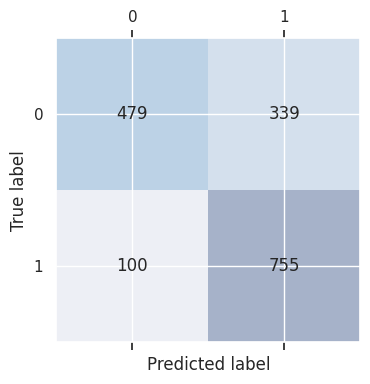

              precision    recall  f1-score   support

    Negative       0.83      0.59      0.69       818
    Positive       0.69      0.88      0.77       855

    accuracy                           0.74      1673
   macro avg       0.76      0.73      0.73      1673
weighted avg       0.76      0.74      0.73      1673


In [39]:
# Implement CNN + LSTM

# Encode Categorical Variable
X = df['OriginalTweet']
y = pd.get_dummies(df['Sentiment']).values
num_classes = df['Sentiment'].nunique()

seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

# Split Train Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,                                                    
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Tokenize Text

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_words = 30
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

(26755,) (6689,) (26755, 2) (6689, 2)


In [40]:
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)
    
def model_evaluate(): 
    # predict class with test set
    y_pred_test =  np.argmax(model.predict(X_test), axis=1)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

In [41]:
def CNN(max_features = 20000, embed_dim = 150, conv_num = 3, lstm_drop = 0.4, dense_activ = 'softmax'):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    
    for i in range(conv_num):
      model.add(Conv1D(filters=40, kernel_size=5, padding='same', activation='relu'))
      model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(100, dropout=lstm_drop, recurrent_dropout=lstm_drop))

    model.add(Dense(num_classes, activation=dense_activ))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [42]:
# Train CNN + LSTM Model
"""
batch_size = 32
epochs = 2
max_features = 50000
embed_dim = 150
model = CNN(max_features, embed_dim, 2, 0.3, 'relu')
model_train(model)
# evaluate model with test set
model_evaluate()
"""

"\nbatch_size = 32\nepochs = 2\nmax_features = 50000\nembed_dim = 150\nmodel = CNN(max_features, embed_dim, 2, 0.3, 'relu')\nmodel_train(model)\n# evaluate model with test set\nmodel_evaluate()\n"

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 44s - loss: 0.5469 - accuracy: 0.7304 - val_loss: 0.4199 - val_accuracy: 0.8284 - 44s/epoch - 53ms/step

Epoch 2/2
837/837 - 28s - loss: 0.3654 - accuracy: 0.8653 - val_loss: 0.4979 - val_accuracy: 0.8022 - 28s/epoch - 34ms/step

210/210 [==============================] - 1s 4ms/step

Accuracy:	80.2%


              precision    recall  f1-score   support

           0       0.86      0.69      0.76      3096
           1       0.77      0.90      0.83      3593

    accuracy                           0.80      6689
   macro avg       0.81      0.79      0.80      6689
weighted avg       0.81      0.80      0.80      6689

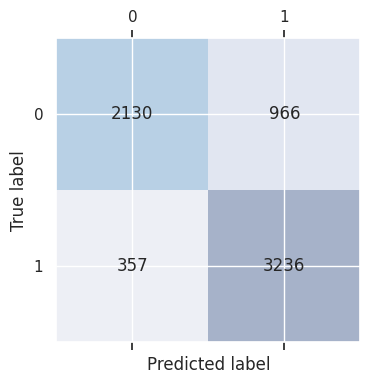

In [43]:
# Hyper Parameter Tuning
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)
    
def Param_Opt(max_features, embed_dim, conv_num, lstm_drop, dense_activ):

 
  def CNN(max_features, embed_dim, conv_num, lstm_drop, dense_activ):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    
    for i in range(conv_num):
      model.add(Conv1D(filters=40, kernel_size=5, padding='same', activation='relu'))
      model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(100, dropout=lstm_drop, recurrent_dropout=lstm_drop))

    model.add(Dense(num_classes, activation=dense_activ))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

  # Run and predict
  CNN_LSTM_Model = CNN(max_features, embed_dim, conv_num, lstm_drop, dense_activ)
  model_train(CNN_LSTM_Model)
  y_pred_test =  np.argmax(CNN_LSTM_Model.predict(X_test), axis=1)
  acc = accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100
  
  # Save all values to array and return the array
  result = [acc,max_features, embed_dim, conv_num, lstm_drop, dense_activ]

  return result



In [44]:
# Specify all input values and run for them
"""
# Array to store
All_results = []

batch_size = 32
epochs = 2

# Specify default parameters
max_features_def = 50000
embed_dim_def = 150
conv_num_def = 2
lstm_drop_def = 0.3
dense_activ_def = 'softmax'

# Specify values to compare
max_features = [2000, 50000]
embed_dim = [100, 150]
conv_num = [2, 3]
lstm_drop = [0.2, 0.3, 0.4]
dense_activ = ['tanh','relu','softmax']

# Test all max_features values
if type(max_features)!= int and len(max_features)>1:
  for i in range(len(max_features)):
    max_features_new = max_features[i]
    model_result = Param_Opt(max_features_new, embed_dim_def, conv_num_def, lstm_drop_def, dense_activ_def)    
    All_results.append(model_result)

# Test all Embedding dimensions
if type(embed_dim)!= int and len(embed_dim)>1:
  for i in range(len(embed_dim)):
    embed_dim_new = embed_dim[i]
    model_result = Param_Opt(max_features_def, embed_dim_new, conv_num_def, lstm_drop_def, dense_activ_def)    
    All_results.append(model_result)

# Test all Convulational Layer Numbers
if type(conv_num)!= int and len(conv_num)>1:
  for i in range(len(conv_num)):
    conv_num_new = conv_num[i]
    model_result = Param_Opt(max_features_def, embed_dim_def, conv_num_new, lstm_drop_def, dense_activ_def)    
    All_results.append(model_result)

# Test all lstm Dropout Parameters
if type(lstm_drop)!= int and len(lstm_drop)>1:
  for i in range(len(lstm_drop)):
    lstm_drop_new = lstm_drop[i]
    model_result = Param_Opt(max_features_def, embed_dim_def, conv_num_def, lstm_drop_new, dense_activ_def)    
    All_results.append(model_result)

# Test all Dense Activation Functions
# Test all lstm Dropout Parameters
if type(dense_activ)!= str and len(dense_activ)>1:
  for i in range(len(dense_activ)):
    dense_activ_new = dense_activ[i]
    model_result = Param_Opt(max_features_def, embed_dim_def, conv_num_def, lstm_drop_def, dense_activ_new)    
    All_results.append(model_result)
"""

"\n# Array to store\nAll_results = []\n\nbatch_size = 32\nepochs = 2\n\n# Specify default parameters\nmax_features_def = 50000\nembed_dim_def = 150\nconv_num_def = 2\nlstm_drop_def = 0.3\ndense_activ_def = 'softmax'\n\n# Specify values to compare\nmax_features = [2000, 50000]\nembed_dim = [100, 150]\nconv_num = [2, 3]\nlstm_drop = [0.2, 0.3, 0.4]\ndense_activ = ['tanh','relu','softmax']\n\n# Test all max_features values\nif type(max_features)!= int and len(max_features)>1:\n  for i in range(len(max_features)):\n    max_features_new = max_features[i]\n    model_result = Param_Opt(max_features_new, embed_dim_def, conv_num_def, lstm_drop_def, dense_activ_def)    \n    All_results.append(model_result)\n\n# Test all Embedding dimensions\nif type(embed_dim)!= int and len(embed_dim)>1:\n  for i in range(len(embed_dim)):\n    embed_dim_new = embed_dim[i]\n    model_result = Param_Opt(max_features_def, embed_dim_new, conv_num_def, lstm_drop_def, dense_activ_def)    \n    All_results.append(mode

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. 
It will use a generic GPU kernel as fallback when running on GPU.
Epoch 1/2
837/837 - 41s - loss: 0.4825 - accuracy: 0.7573 - val_loss: 0.4059 - val_accuracy: 0.8142 - 41s/epoch - 49ms/step

Epoch 2/2
837/837 - 26s - loss: 0.3744 - accuracy: 0.8349 - val_loss: 0.3994 - val_accuracy: 0.8127 - 26s/epoch - 32ms/step

210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 43s - loss: 0.4672 - accuracy: 0.7645 - val_loss: 0.3773 - val_accuracy: 0.8341 - 43s/epoch - 52ms/step

Epoch 2/2
837/837 - 27s - loss: 0.2472 - accuracy: 0.8999 - val_loss: 0.3754 - val_accuracy: 0.8417 - 27s/epoch - 32ms/step
210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 49s - loss: 0.4722 - accuracy: 0.7636 - val_loss: 0.3587 - val_accuracy: 0.8433 - 49s/epoch - 58ms/step

Epoch 2/2
837/837 - 29s - loss: 0.2450 - accuracy: 0.9020 - val_loss: 0.4028 - 
val_accuracy: 0.8361 - 29s/epoch - 34ms/step

210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 42s - loss: 0.4662 - accuracy: 0.7689 - val_loss: 0.3789 - val_accuracy: 0.8296 - 42s/epoch - 51ms/step

Epoch 2/2
837/837 - 27s - loss: 0.2397 - accuracy: 0.9043 - val_loss: 0.3745 - val_accuracy: 0.8405 - 27s/epoch - 32ms/step

210/210 [==============================] - 1s 4ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 42s - loss: 0.4600 - accuracy: 0.7753 - val_loss: 0.3628 - val_accuracy: 0.8373 - 42s/epoch - 50ms/step

Epoch 2/2
837/837 - 27s - loss: 0.2415 - accuracy: 0.9026 - val_loss: 0.4038 - val_accuracy: 0.8320 - 27s/epoch - 32ms/step

210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 33s - loss: 0.4718 - accuracy: 0.7650 - val_loss: 0.3740 - val_accuracy: 0.8294 - 33s/epoch - 39ms/step

Epoch 2/2
837/837 - 16s - loss: 0.2414 - accuracy: 0.9008 - val_loss: 0.3996 - val_accuracy: 0.8360 - 16s/epoch - 19ms/step

210/210 [==============================] - 1s 3ms/step


WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 43s - loss: 0.4616 - accuracy: 0.7754 - val_loss: 0.3815 - val_accuracy: 0.8327 - 43s/epoch - 52ms/step

Epoch 2/2
837/837 - 26s - loss: 0.2368 - accuracy: 0.9056 - val_loss: 0.3903 - val_accuracy: 0.8276 - 26s/epoch - 31ms/step

210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 44s - loss: 0.4606 - accuracy: 0.7747 - val_loss: 0.3657 - val_accuracy: 0.8388 - 44s/epoch - 52ms/step

Epoch 2/2
837/837 - 28s - loss: 0.2407 - accuracy: 0.9042 - val_loss: 0.3766 - val_accuracy: 0.8421 - 28s/epoch - 33ms/step

210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 42s - loss: 0.4626 - accuracy: 0.7732 - val_loss: 0.3740 - val_accuracy: 0.8370 - 42s/epoch - 50ms/step

Epoch 2/2
837/837 - 27s - loss: 0.2470 - accuracy: 0.9009 - val_loss: 0.3747 - val_accuracy: 0.8378 - 27s/epoch - 33ms/step

210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 43s - loss: 8.6943 - accuracy: 0.5402 - val_loss: 8.6578 - val_accuracy: 0.5372 - 43s/epoch - 51ms/step

Epoch 2/2
837/837 - 27s - loss: 8.7070 - accuracy: 0.5402 - val_loss: 8.6578 - val_accuracy: 0.5372 - 27s/epoch - 32ms/step

210/210 [==============================] - 1s 4ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 42s - loss: nan - accuracy: 0.4598 - val_loss: nan - val_accuracy: 0.4628 - 42s/epoch - 51ms/step

Epoch 2/2
837/837 - 28s - loss: nan - accuracy: 0.4598 - val_loss: nan - val_accuracy: 0.4628 - 28s/epoch - 34ms/step

210/210 [==============================] - 1s 3ms/step

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 43s - loss: 0.4633 - accuracy: 0.7671 - val_loss: 0.3682 - val_accuracy: 0.8376 - 43s/epoch - 52ms/step

Epoch 2/2
837/837 - 27s - loss: 0.2448 - accuracy: 0.9024 - val_loss: 0.4090 - val_accuracy: 0.8390 - 27s/epoch - 33ms/step

210/210 [==============================] - 1s 3ms/step

In [45]:
# Print All results
"""
print("['Accuracy','Max features', 'Embed dim', 'Conv num', 'Lstm drop', 'Dense activ']")
for i in range(len(All_results)):
  print(All_results[i])
"""

'\nprint("[\'Accuracy\',\'Max features\', \'Embed dim\', \'Conv num\', \'Lstm drop\', \'Dense activ\']")\nfor i in range(len(All_results)):\n  print(All_results[i])\n'

['Accuracy','Max features', 'Embed dim', 'Conv num', 'Lstm drop', 'Dense activ']

[81.26775302735835, 2000, 150, 2, 0.3, 'softmax']

[84.1680370757961, 50000, 150, 2, 0.3, 'softmax']

[83.61489011810434, 50000, 100, 2, 0.3, 'softmax']

[84.04843773359246, 50000, 150, 2, 0.3, 'softmax']

[83.1962924203917, 50000, 150, 2, 0.3, 'softmax']

[83.59994020032889, 50000, 150, 3, 0.3, 'softmax']

[82.76274480490358, 50000, 150, 2, 0.2, 'softmax']

[84.21288682912244, 50000, 150, 2, 0.3, 'softmax']

[83.77933921363433, 50000, 150, 2, 0.4, 'softmax']

[53.715054567199886, 50000, 150, 2, 0.3, 'tanh']

[46.284945432800114, 50000, 150, 2, 0.3, 'relu']

[83.89893855583794, 50000, 150, 2, 0.3, 'softmax']

In [46]:
# Max result
# We can see that we get best resuls when 
# Max_Features = 50000
# Embedding Dimensions = 150
# Convolutional Layer Numbers = 3
# LSTM Drop = 0.3
# Dense Activation = softmax 

In [47]:
# Evaluate Model with combinations of all best parameters
"""
model = CNN(50000, 150, 3, 0.3, 'softmax')
model_train(model)
# evaluate model with test set
model_evaluate()
"""

"\nmodel = CNN(50000, 150, 3, 0.3, 'softmax')\nmodel_train(model)\n# evaluate model with test set\nmodel_evaluate()\n"

WARNING:tensorflow:Layer lstm will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.

Epoch 1/2
837/837 - 32s - loss: 0.4679 - accuracy: 0.7699 - val_loss: 0.3696 - val_accuracy: 0.8396 - 32s/epoch - 38ms/step

Epoch 2/2
837/837 - 19s - loss: 0.2441 - accuracy: 0.9016 - val_loss: 0.3762 - val_accuracy: 0.8375 - 19s/epoch - 23ms/step

210/210 [==============================] - 1s 3ms/step

Accuracy:	83.7%


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3096
           1       0.84      0.86      0.85      3593

    accuracy                           0.84      6689
   macro avg       0.84      0.84      0.84      6689
weighted avg       0.84      0.84      0.84      6689

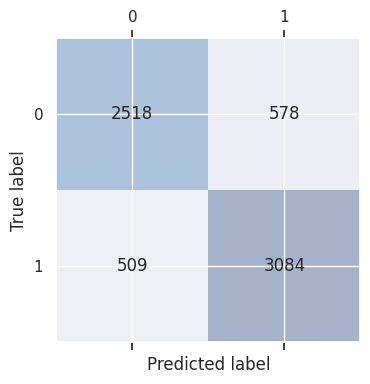

In [48]:
# Compare with Model before Hyperfine Tuning
# Accuracy before Hyperfine Tuning was 80.2%
# Accuracy after Hyperfine Tuning is 83.7%

In [49]:
# Conclusion
"""
The dataset only has missing values in the non-essential fields like ‘Location’ or ‘Tweet At’. These were replaced row-wise using EDA.
London was the most common tweet location, followed by New York and Washington, DC.
The Support Vector Classification model performed best at 86% accuracy followed by Logistic Regression (84%), Random Forest (77%) and Bernoulli Naive Bayes (74 %).
A CNN + LSTM Deep Learning model was used to analyze the dataset. 
The initial model demonstrated an accuracy of 80%.
However, hypertuning the model resulted in increasing the accuracy by ~4%.
This was achieved by using more maximum features and embedding dimensions for the embedding layer, a dropout rate of 0.3 for the LSTM and 3 CNN layers. 
"""

'\nThe dataset only has missing values in the non-essential fields like ‘Location’ or ‘Tweet At’. These were replaced row-wise using EDA.\nLondon was the most common tweet location, followed by New York and Washington, DC.\nThe Support Vector Classification model performed best at 86% accuracy followed by Logistic Regression (84%), Random Forest (77%) and Bernoulli Naive Bayes (74 %).\nA CNN + LSTM Deep Learning model was used to analyze the dataset. \nThe initial model demonstrated an accuracy of 80%.\nHowever, hypertuning the model resulted in increasing the accuracy by ~4%.\nThis was achieved by using more maximum features and embedding dimensions for the embedding layer, a dropout rate of 0.3 for the LSTM and 3 CNN layers. \n'